## This kernel compare EDA selected feature list with Model feature importance list

In [1]:
import pandas as pd
import numpy as np
import re
import time
import os
import sys
from IPython.display import clear_output
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(color_codes=True)

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
rmv_names_path = '../output/columns/forceremove.column.names'
rmv_names = list(line.strip() for line in open(rmv_names_path, 'r'))

In [3]:
train = pd.read_csv('../input/train.csv')
all_feats = train.columns.values.tolist()

In [4]:
sel_feats = list(set(all_feats) - set(rmv_names))

### Model 1: LGBM Baseline Model

In [5]:
sub_lgb_fi = pd.read_csv('../output/sub_lgb_bl_fe.csv')
sub_lgb_fi = sub_lgb_fi[sub_lgb_fi.gain>0]
sub_lgb_fi.head()

,feature,gain,split
0,f190486d6,12.508257,629
1,eeb9cd3aa,5.662622,419
2,58e2e02e6,3.781215,455
3,9fd594eec,3.012605,305
4,15ace8c9f,2.188851,286


In [6]:
print(sub_lgb_fi.feature[:20].tolist())

['f190486d6', 'eeb9cd3aa', '58e2e02e6', '9fd594eec', '15ace8c9f', 'b43a7cfd5', '491b9ee45', '6eef030c1', '024c577b9', '1702b5bf0', '20aa07010', '58232a6fb', 'f74e8f13d', 'd6bb78916', 'fb0f5dbfe', '58e056e12', 'c5a231d81', '64e483341', '45f6d00da', 'f8b733d3f']


In [7]:
sel_ratios = []
for nrows in np.arange(1, len(sub_lgb_fi), 1):
    sel_ratios.append(np.sum([x in sel_feats for x in sub_lgb_fi.feature[:nrows]]) / nrows)

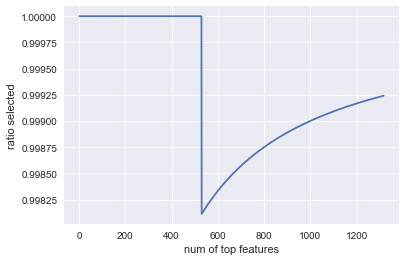

In [8]:
plt.plot(np.arange(1, len(sub_lgb_fi), 1), sel_ratios)
plt.xlabel('num of top features')
plt.ylabel('ratio selected')
plt.show()

### Model 2: XGB with Auto-Encoder features

In [9]:
xgb_aec_fi = pd.read_csv('../output/feat_importance_xgb_aec.csv', index_col=0)
xgb_aec_fi.head(10)

,Feature,Gain,Cover,Frequency
1,DF.L2.C3,0.036050,0.013514,0.027066
2,DF.L2.C2,0.029218,0.013485,0.026786
3,DF.L2.C1,0.027100,0.013322,0.025911
4,DF.L2.C4,0.025123,0.013586,0.025352
5,DF.L2.C6,0.022888,0.011362,0.021645
6,DF.L2.C5,0.019018,0.010049,0.019913
7,f190486d6,0.016699,0.006392,0.007749
8,15ace8c9f,0.013813,0.005489,0.008215
9,eeb9cd3aa,0.012451,0.004669,0.006315
10,024c577b9,0.011284,0.004510,0.006426


In [10]:
sel_ratios = []
for nrows in np.arange(1, len(xgb_aec_fi[6:]), 1):
    sel_ratios.append(np.sum([x in sel_feats for x in xgb_aec_fi.loc[7:, 'Feature'][:nrows]]) / nrows)

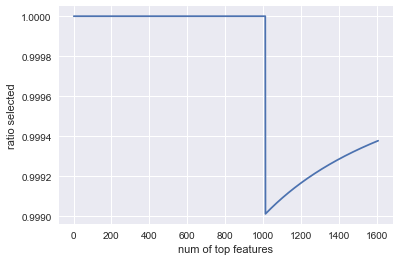

In [11]:
plt.plot(np.arange(1, len(xgb_aec_fi[6:]), 1), sel_ratios)
plt.xlabel('num of top features')
plt.ylabel('ratio selected')
plt.show()